In [1]:
import os
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing import event_accumulator

In [31]:
def plot_tsbd(folder):
    ea_train = event_accumulator.EventAccumulator('runs/'+folder+'/rmse_train')
    ea_val = event_accumulator.EventAccumulator('runs/'+folder+'/rmse_val')
    ea_train.Reload()
    ea_val.Reload()

    train_rmse_data = ea_train.Scalars('rmse')  # Replace 'rmse/train' with your actual tag for train RMSE
    val_rmse_data = ea_val.Scalars('rmse')      # Replace 'rmse/val' with your actual tag for validation RMSE

    train_steps = [scalar.step for scalar in train_rmse_data]
    train_values = [scalar.value for scalar in train_rmse_data]

    val_steps = [scalar.step for scalar in val_rmse_data]
    val_values = [scalar.value for scalar in val_rmse_data]

    plt.plot(train_steps, train_values, label='Train RMSE')
    plt.plot(val_steps, val_values, label='Validation RMSE')

    plt.xlabel('Epoch')
    plt.ylabel('RMSE')
    plt.legend()
    plt.title('RMSE for '+str(folder))
    plt.show()

    print('Best validation RMSE: {:.4f} at epoch {}'.format(min(val_values), val_values.index(min(val_values))+1))


def plot_tsbd_dif_vals(dict_fold_name):
    """dict is {folder: description}"""
    for folder, desc in dict_fold_name.items():
        ea = event_accumulator.EventAccumulator('runs/'+folder+'/rmse_val')
        ea.Reload()
        rmse_data = ea.Scalars('rmse')
        steps = [scalar.step for scalar in rmse_data]
        values = [scalar.value for scalar in rmse_data]
        plt.plot(steps, values, label=desc)
        print('Best validation RMSE for setup {}: {:.4f} at epoch {}'.format(desc, min(values), values.index(min(values))+1))
    plt.xlabel('Epoch')
    plt.ylabel('RMSE')
    plt.legend()
    plt.title('Val RMSE for different models')
    


Best validation RMSE for setup GAT with 4 heads: 0.9405 at epoch 100
Best validation RMSE for setup GAT with 16 heads: 0.9426 at epoch 78
Best validation RMSE for setup GAT with 32 heads: 0.9278 at epoch 115


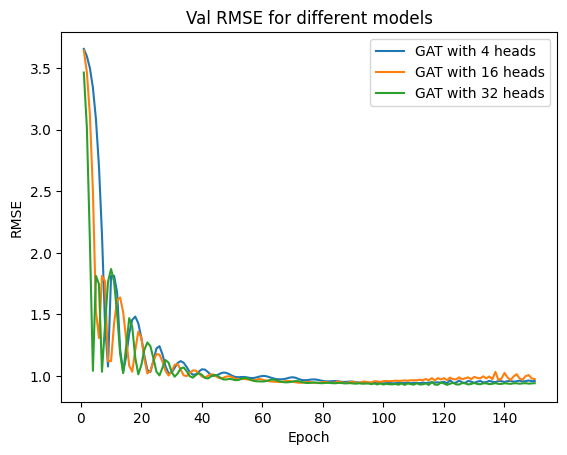

In [32]:
dict_fold_name = {'4_heads': 'GAT with 4 heads', '16_heads': 'GAT with 16 heads', '32_heads': 'GAT with 32 heads'}
plot_tsbd_dif_vals(dict_fold_name)

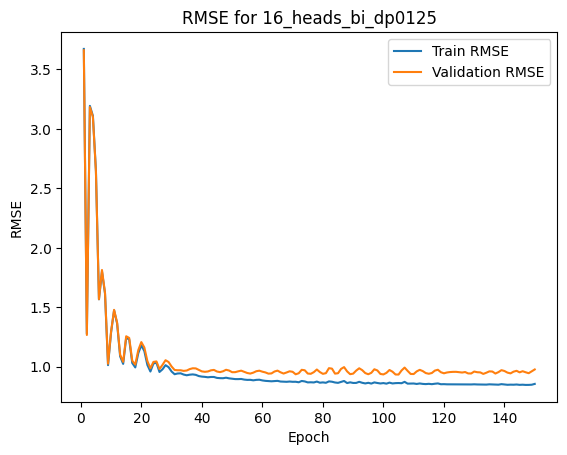

Best validation RMSE: 0.9348 at epoch 105


In [25]:
plot_tsbd('16_heads_bi_dp0125')